<a href="https://colab.research.google.com/github/akanshachabra/customer_segmentation/blob/main/Copy_of_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and Analysis

In [ ]:
#loading the data from csv file to a pandas Dataframe
customer_data=pd.read_csv('/content/customer_segmentation_data.csv')

In [ ]:
#first five rows in the dataframe
customer_data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
#finding the no.of rows and columns
customer_data.shape

(1000, 9)

In [ ]:
#getting some info about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
#checking for missing values
customer_data.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


choosing the income column and spending score column


In [ ]:
x=customer_data.iloc[:,[3,4]].values

In [ ]:
print(x)

[[ 99342     90]
 [ 78852     60]
 [126573     30]
 ...
 [113097     40]
 [113695     63]
 [ 90420      7]]


choosing the no. of clusters
#wcss->within clusters sum of squares
#elbow method (find wcsss values for different no. of clusters)

In [ ]:
wcss=[]

for i in range(1,11):
   kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
   kmeans.fit(x)
   wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

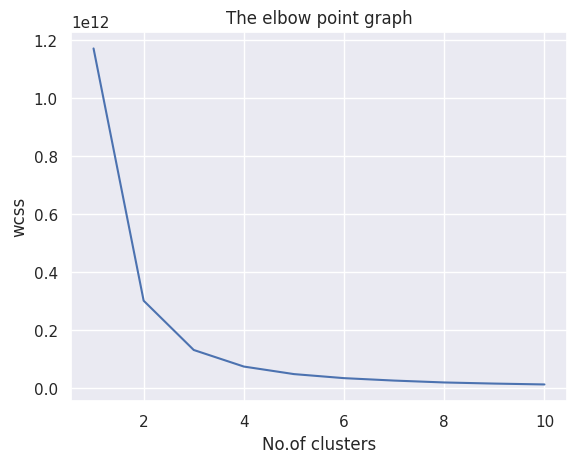

In [ ]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point graph")
plt.xlabel("No.of clusters")
plt.ylabel("wcss")
plt.show()

optimum no. of clusters=4

In [ ]:

#training the k-means clustering model
# k represent the no of clustering modelnow k=4

kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)

#return a label for each data point based on their clusters

y=kmeans.fit_predict(x)
print(y)

[1 2 3 0 3 0 0 1 0 0 2 0 2 0 1 3 1 0 1 1 2 0 2 2 0 3 0 0 2 1 2 0 2 2 0 2 1
 2 2 1 2 1 2 0 0 1 3 2 2 3 0 1 3 0 2 2 0 1 2 3 2 2 2 2 2 1 3 2 3 0 2 0 1 1
 3 3 0 0 1 0 1 3 1 0 1 0 0 0 1 2 2 1 0 1 2 1 1 0 1 0 1 0 2 3 0 3 0 2 2 0 1
 2 2 0 2 3 3 0 1 2 1 0 0 0 2 2 0 2 0 3 0 1 1 0 1 3 2 1 1 2 2 0 1 2 3 2 2 1
 2 1 3 2 0 2 3 1 0 0 1 2 1 3 2 1 1 0 0 2 0 0 3 1 1 2 2 2 3 3 1 1 2 3 0 2 1
 3 3 2 1 0 1 1 0 2 0 1 0 1 2 1 1 0 1 1 3 1 0 2 3 1 2 0 1 2 3 3 2 3 0 3 2 2
 3 0 2 0 2 0 0 0 3 3 2 1 0 2 0 3 3 3 0 3 1 1 3 2 0 0 3 2 2 1 3 1 3 0 3 2 0
 0 1 0 1 0 3 2 1 1 1 0 0 1 2 1 3 0 1 0 1 0 0 2 1 2 1 3 1 1 2 2 0 0 0 2 3 3
 1 3 0 3 1 3 0 2 0 0 3 2 1 1 3 3 0 3 2 0 2 2 0 0 2 3 2 1 2 0 0 2 2 0 2 0 3
 1 3 1 0 1 1 0 0 2 0 3 1 1 0 3 0 3 3 0 1 0 2 1 1 3 2 0 3 1 3 3 2 1 2 3 2 0
 2 0 2 2 0 0 3 1 0 3 1 1 3 1 2 1 1 1 1 2 1 0 3 2 1 2 0 0 2 3 2 3 3 0 0 3 1
 3 2 1 2 2 1 1 0 0 1 1 2 0 2 0 1 3 2 3 0 2 0 3 1 3 1 0 2 3 0 1 1 3 2 2 3 0
 2 0 2 0 0 0 3 1 0 3 3 0 1 0 1 1 3 0 0 3 0 3 1 0 1 3 0 0 1 1 1 3 1 3 3 0 1
 1 0 0 0 2 1 3 1 1 0 2 1 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


visualising all the clusters


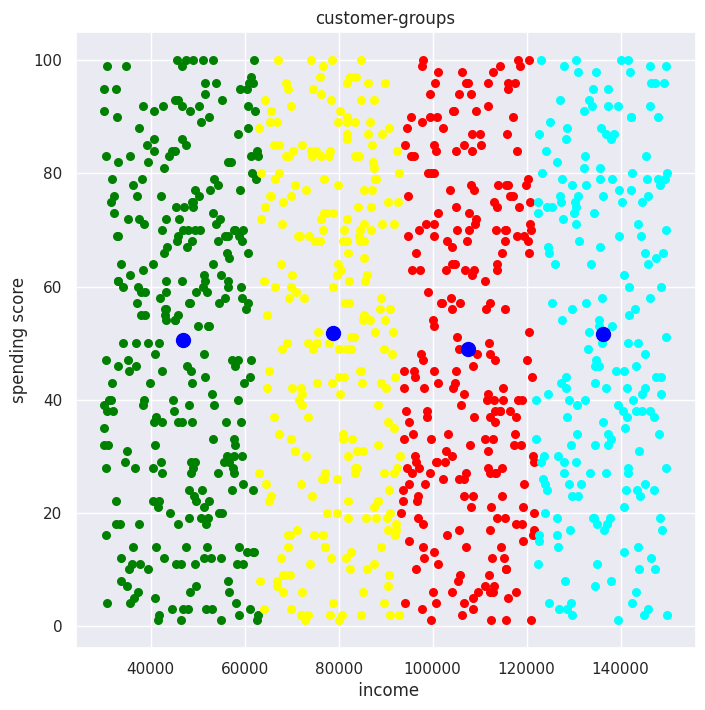

In [ ]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=30,c='green',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=30,c='red',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=30,c='yellow',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=30,c='cyan',label='cluster4')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('customer-groups')
plt.xlabel(' income')
plt.ylabel('spending score')
plt.show()